In [24]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [25]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

# Set number of classifications# 分類数設定

In [26]:
NUM_CLASSES = 3

# input length

In [27]:
TIME_STEPS = 16
DIMENSION = 2

# Load learning data

In [28]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [29]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# model building

In [31]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [32]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 24)                792       
_________________________________________________________________
dropout_3 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                250       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 33        
Total params: 1,075
Trainable params: 1,075
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early termination
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [34]:
# model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# model training

In [35]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
4/4 [==============================] - 0s 38ms/step - loss: 1.0929 - accuracy: 0.2367 - val_loss: 1.0719 - val_accuracy: 0.3696

Epoch 00001: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 2/1000
4/4 [==============================] - 0s 12ms/step - loss: 1.0802 - accuracy: 0.3092 - val_loss: 1.0615 - val_accuracy: 0.4710

Epoch 00002: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 3/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0724 - accuracy: 0.3309 - val_loss: 1.0521 - val_accuracy: 0.5217

Epoch 00003: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 4/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0654 - accuracy: 0.3889 - val_loss: 1.0432 - val_accuracy: 0.5290

Epoch 00004: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 5/1000
4/4 [==============================] - 0s 10ms/step - loss: 1

4/4 [==============================] - 0s 9ms/step - loss: 0.8107 - accuracy: 0.5435 - val_loss: 0.7293 - val_accuracy: 0.6377

Epoch 00036: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 37/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.7904 - accuracy: 0.5507 - val_loss: 0.7208 - val_accuracy: 0.6522

Epoch 00037: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 38/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.7882 - accuracy: 0.5870 - val_loss: 0.7120 - val_accuracy: 0.6812

Epoch 00038: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 39/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.7825 - accuracy: 0.5966 - val_loss: 0.7035 - val_accuracy: 0.7174

Epoch 00039: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 40/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.7872 - accu

4/4 [==============================] - 0s 10ms/step - loss: 0.6017 - accuracy: 0.8140 - val_loss: 0.4957 - val_accuracy: 0.9275

Epoch 00071: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 72/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.5838 - accuracy: 0.8261 - val_loss: 0.4911 - val_accuracy: 0.9275

Epoch 00072: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 73/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.5813 - accuracy: 0.8140 - val_loss: 0.4866 - val_accuracy: 0.9348

Epoch 00073: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 74/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.5797 - accuracy: 0.8285 - val_loss: 0.4825 - val_accuracy: 0.9348

Epoch 00074: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 75/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.5810 - ac

4/4 [==============================] - 0s 9ms/step - loss: 0.4858 - accuracy: 0.8865 - val_loss: 0.3871 - val_accuracy: 0.9420

Epoch 00106: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 107/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.4945 - accuracy: 0.8575 - val_loss: 0.3842 - val_accuracy: 0.9420

Epoch 00107: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 108/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.4826 - accuracy: 0.8720 - val_loss: 0.3818 - val_accuracy: 0.9420

Epoch 00108: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 109/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.4639 - accuracy: 0.8986 - val_loss: 0.3798 - val_accuracy: 0.9420

Epoch 00109: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 110/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.4739 -

4/4 [==============================] - 0s 9ms/step - loss: 0.3846 - accuracy: 0.8865 - val_loss: 0.2891 - val_accuracy: 0.9638

Epoch 00141: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 142/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.3749 - accuracy: 0.9034 - val_loss: 0.2857 - val_accuracy: 0.9638

Epoch 00142: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 143/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.3771 - accuracy: 0.9034 - val_loss: 0.2825 - val_accuracy: 0.9638

Epoch 00143: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 144/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.3895 - accuracy: 0.8768 - val_loss: 0.2795 - val_accuracy: 0.9638

Epoch 00144: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 145/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.3776 -

4/4 [==============================] - 0s 10ms/step - loss: 0.3119 - accuracy: 0.8986 - val_loss: 0.2100 - val_accuracy: 0.9710

Epoch 00176: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 177/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.3083 - accuracy: 0.8937 - val_loss: 0.2091 - val_accuracy: 0.9710

Epoch 00177: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 178/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.3127 - accuracy: 0.9106 - val_loss: 0.2083 - val_accuracy: 0.9710

Epoch 00178: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 179/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.3150 - accuracy: 0.9010 - val_loss: 0.2065 - val_accuracy: 0.9710

Epoch 00179: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 180/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2866 -

4/4 [==============================] - 0s 9ms/step - loss: 0.2605 - accuracy: 0.9130 - val_loss: 0.1722 - val_accuracy: 0.9710

Epoch 00211: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 212/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2771 - accuracy: 0.9034 - val_loss: 0.1712 - val_accuracy: 0.9710

Epoch 00212: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 213/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2816 - accuracy: 0.9106 - val_loss: 0.1702 - val_accuracy: 0.9710

Epoch 00213: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 214/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2700 - accuracy: 0.9227 - val_loss: 0.1693 - val_accuracy: 0.9710

Epoch 00214: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 215/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2643 - 

4/4 [==============================] - 0s 9ms/step - loss: 0.2626 - accuracy: 0.9082 - val_loss: 0.1527 - val_accuracy: 0.9710

Epoch 00246: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 247/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2563 - accuracy: 0.9155 - val_loss: 0.1523 - val_accuracy: 0.9710

Epoch 00247: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 248/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2671 - accuracy: 0.9058 - val_loss: 0.1515 - val_accuracy: 0.9710

Epoch 00248: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 249/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.2452 - accuracy: 0.9227 - val_loss: 0.1513 - val_accuracy: 0.9710

Epoch 00249: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 250/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.2592 -

4/4 [==============================] - 0s 8ms/step - loss: 0.2488 - accuracy: 0.9179 - val_loss: 0.1402 - val_accuracy: 0.9710

Epoch 00281: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 282/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.2400 - accuracy: 0.9130 - val_loss: 0.1398 - val_accuracy: 0.9710

Epoch 00282: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 283/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.2525 - accuracy: 0.9179 - val_loss: 0.1396 - val_accuracy: 0.9710

Epoch 00283: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 284/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2409 - accuracy: 0.9227 - val_loss: 0.1394 - val_accuracy: 0.9710

Epoch 00284: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 285/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2360 

4/4 [==============================] - 0s 8ms/step - loss: 0.2497 - accuracy: 0.9179 - val_loss: 0.1318 - val_accuracy: 0.9710

Epoch 00316: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 317/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.2217 - accuracy: 0.9324 - val_loss: 0.1316 - val_accuracy: 0.9710

Epoch 00317: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 318/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.2274 - accuracy: 0.9275 - val_loss: 0.1313 - val_accuracy: 0.9710

Epoch 00318: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 319/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.2306 - accuracy: 0.9227 - val_loss: 0.1310 - val_accuracy: 0.9710

Epoch 00319: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 320/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2405 

4/4 [==============================] - 0s 9ms/step - loss: 0.2226 - accuracy: 0.9227 - val_loss: 0.1258 - val_accuracy: 0.9710

Epoch 00351: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 352/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2637 - accuracy: 0.8961 - val_loss: 0.1258 - val_accuracy: 0.9710

Epoch 00352: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 353/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2161 - accuracy: 0.9179 - val_loss: 0.1258 - val_accuracy: 0.9710

Epoch 00353: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 354/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2254 - accuracy: 0.9227 - val_loss: 0.1258 - val_accuracy: 0.9710

Epoch 00354: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 355/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2257 - 

4/4 [==============================] - 0s 11ms/step - loss: 0.2427 - accuracy: 0.9203 - val_loss: 0.1227 - val_accuracy: 0.9710

Epoch 00386: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 387/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.2309 - accuracy: 0.9203 - val_loss: 0.1226 - val_accuracy: 0.9710

Epoch 00387: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 388/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2088 - accuracy: 0.9396 - val_loss: 0.1226 - val_accuracy: 0.9710

Epoch 00388: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 389/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2324 - accuracy: 0.9130 - val_loss: 0.1223 - val_accuracy: 0.9710

Epoch 00389: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 390/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.2267

4/4 [==============================] - 0s 10ms/step - loss: 0.2181 - accuracy: 0.9275 - val_loss: 0.1194 - val_accuracy: 0.9710

Epoch 00421: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 422/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2221 - accuracy: 0.9251 - val_loss: 0.1193 - val_accuracy: 0.9710

Epoch 00422: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 423/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2202 - accuracy: 0.9324 - val_loss: 0.1192 - val_accuracy: 0.9710

Epoch 00423: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 424/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2149 - accuracy: 0.9348 - val_loss: 0.1191 - val_accuracy: 0.9710

Epoch 00424: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 425/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2319 -

4/4 [==============================] - 0s 9ms/step - loss: 0.2037 - accuracy: 0.9348 - val_loss: 0.1172 - val_accuracy: 0.9710

Epoch 00456: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 457/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2066 - accuracy: 0.9227 - val_loss: 0.1169 - val_accuracy: 0.9710

Epoch 00457: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 458/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2006 - accuracy: 0.9275 - val_loss: 0.1167 - val_accuracy: 0.9710

Epoch 00458: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 459/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2137 - accuracy: 0.9179 - val_loss: 0.1166 - val_accuracy: 0.9710

Epoch 00459: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 460/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1975 - 

4/4 [==============================] - 0s 9ms/step - loss: 0.2161 - accuracy: 0.9300 - val_loss: 0.1155 - val_accuracy: 0.9710

Epoch 00491: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 492/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2177 - accuracy: 0.9300 - val_loss: 0.1157 - val_accuracy: 0.9710

Epoch 00492: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 493/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2156 - accuracy: 0.9203 - val_loss: 0.1158 - val_accuracy: 0.9710

Epoch 00493: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 494/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2061 - accuracy: 0.9300 - val_loss: 0.1158 - val_accuracy: 0.9710

Epoch 00494: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 495/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2190 - 

4/4 [==============================] - 0s 9ms/step - loss: 0.2110 - accuracy: 0.9348 - val_loss: 0.1145 - val_accuracy: 0.9710

Epoch 00526: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 527/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2187 - accuracy: 0.9275 - val_loss: 0.1146 - val_accuracy: 0.9710

Epoch 00527: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 528/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.2155 - accuracy: 0.9275 - val_loss: 0.1147 - val_accuracy: 0.9710

Epoch 00528: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 529/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.2139 - accuracy: 0.9324 - val_loss: 0.1148 - val_accuracy: 0.9710

Epoch 00529: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 530/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1813 -

In [36]:
# Loading a saved model
model = tf.keras.models.load_model(model_save_path)

In [37]:
# Reasoning test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[0.08375119 0.00935904 0.9068898 ]
2


# Mixed rows

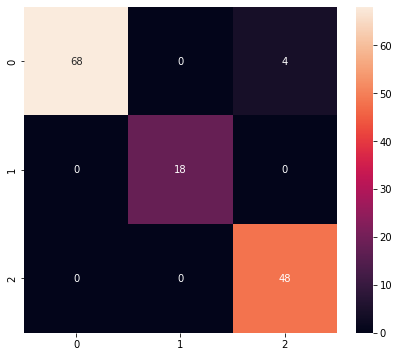

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        72
           1       1.00      1.00      1.00        18
           2       0.92      1.00      0.96        48

    accuracy                           0.97       138
   macro avg       0.97      0.98      0.98       138
weighted avg       0.97      0.97      0.97       138



In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [39]:
# Save as a model for inference only
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [40]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [41]:
# Convert model (quantize
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Asus\AppData\Local\Temp\tmpouu1uy9b\assets


INFO:tensorflow:Assets written to: C:\Users\Asus\AppData\Local\Temp\tmpouu1uy9b\assets


6256

# Inference test

In [42]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [43]:
# Get I / O tensor

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'input_2', 'index': 0, 'shape': array([ 1, 32]), 'shape_signature': array([-1, 32]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [44]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [45]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [46]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.08375118 0.00935904 0.9068898 ]
2
